<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC_%D0%9F%D0%BE%D0%BB%D0%BD%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D1%8B%D0%B5_%D1%81%D0%BB%D0%BE%D0%B8%2C_%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D0%BA_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%BE%D1%80%D0%B5%D0%B2%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_Kaggle_%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

# Основы искусственных нейронных сетей. Обучение с учителем. Полносвязные слои, понятие выборок данных. - соревнование Kaggle

! Не забудьте создать копию ноутбука и в ней работать, чтобы она у Вас сохранилась с Вашими данными работы и обучения в ячейках: Файл - сохранить копию на Диске.


### Установка и загрузка необходимых модулей

In [ ]:
# установка свежего API Kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


####! После установки свежего API Kaggle, рекомендуем перезапустить среду выполнения. Далее, последовательно выполнять ячейки. Иначе будут ошибки в ячейках.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from sklearn.model_selection import train_test_split

from google.colab import drive


#Домашнее задание

##**Задание 1.** 
Загрузите из датасета по ссылке ниже базу цифр MNIST, а также базу для тестирования. С помощью методов, изученных в занятиях по работе с таблицами Pandas, Анализ и обработка данных, и данном занятии, обработайте датасет и подайте в нейронную сеть, постаравшись добиться максимальной точности распознавания. Для улучшения обучения можно использовать также дополнительные методы, не рассмотренные в занятиях, слои, функции активации, менять параметры оптимизатора Adam и прочие гиперпараметры. Результаты рекомендуется заносить в таблицу для себя, чтобы можно было потом воспроизвести лучший вариант. Предсказание Вашей сети необходимо отправить в виде специального файла с расширением csv, чтобы войти в рейтинговую таблицу соревнования. Следуйте коду в ноутбуке 
для создания ответа. Ответ можно улучшить и подавать результат несколько раз. 

Ссылка на соревнование (не забудьте вначале зарегистрироваться на Каггл и войти в аккаунт, тогда ссылка приведёт на соревнование):

https://www.kaggle.com/t/fe542b8b22b64e4c931094fb66423131

Таблица лидеров:

https://www.kaggle.com/c/udt3/leaderboard

Общемировое соревнование:

https://www.kaggle.com/c/digit-recognizer

Описание: Файлы данных этого датасета - train.csv и test.csv - содержат полутоновые изображения нарисованных от руки цифр от нуля до девяти.

Каждое изображение имеет 28 пикселей в высоту и 28 пикселей в ширину, всего 784 пикселя. Каждый пиксель имеет одно связанное с ним значение пикселя, указывающее яркость или темноту этого пикселя, причем более низкие числа означают более темный. Это значение пикселя представляет собой целое число от 0 до 255 включительно.

Набор обучающих данных (train.csv) содержит 785 столбцов. Первый столбец, называемый «метка» (label), - это цифра, нарисованная пользователем. Остальные столбцы содержат значения пикселей связанного изображения.

Каждый столбец пикселей в обучающем наборе имеет имя, например pixelx, где x - целое число от 0 до 783 включительно. Чтобы найти этот пиксель на изображении, предположим, что мы разложили x как x = i * 28 + j, где i и j - целые числа от 0 до 27 включительно. Тогда pixelx расположен в строке i и столбце j матрицы 28 x 28 (индексирование нулем).

Например, pixel31 указывает пиксель, который находится в четвертом столбце слева и во второй строке сверху, как на ascii-диаграмме ниже.

Визуально, если мы опускаем префикс «пиксель», пиксели составляют изображение следующим образом:

000 001 002 003 ... 026 027

028 029 030 031 ... 054 055

056 057 058 059 ... 082 083

 |   |   |   |  ...  |   |

728 729 730 731 ... 754 755

756 757 758 759 ... 782 783

Набор тестовых данных (test.csv) такой же, как обучающий набор, за исключением того, что он не содержит столбца «метка».

Ваш файл отправки должен быть в следующем формате: для каждого из 28000 изображений в тестовом наборе выведите одну строку, содержащую ImageId и прогнозируемую цифру. Например, если вы предсказываете, что первое изображение имеет 3, второе изображение - 7, а третье изображение - 8, то ваш файл отправки будет выглядеть так:

ImageId,Label

1,3

2,7

3,8
 
(ещё 27997 строк)

Метрика оценки для этого конкурса - точность категоризации или доля тестовых изображений, которые правильно классифицированы. Например, точность категоризации 0,97 означает, что вы правильно классифицировали все изображения, кроме 3%.

##Решение

#### Создаём правильную папку для ключа Каггл

In [ ]:
!mkdir /root/.kaggle # создаём папку ~/.kaggle для ключа kaggle в Колабе, она должна быть такой по требованию Каггл

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# переходим в папку, теперь это путь по умолчанию
%cd /root/.kaggle 

/root/.kaggle


In [ ]:
#запускаем - подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
#после запуска переходим по ссылке, которая появится, для идентификации
#копируем оттуда код authorization code и вставляем здесь в окошко
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Устанавливаем ключ Каггл, чтобы участвовать в соревнованиях

Нужно зарегистрироваться на Каггл (https://www.kaggle.com/) и скачать ключ для взаимодействия с API соревновательной системы Каггла. После регистрации, справа появятся Ваши имя и фамилия - ссылка на персональную страницу. Нажмите на них. Когда страница загрузится, справа увидите Account. Нажимаете на надпись, затем прокручиваете страницу вниз, до вкладки API, там нажимаете Create New API Token. 
Ключ - это файл kaggle.json, который скачается после нажатия. Нужно скопировать его в папку Google Drive, предварительно её создав: My Drive/datasets/kaggle/ (из Колаба её адрес, который будем указывать для загрузки, такой: /content/drive/My Drive/datasets/kaggle/).

In [ ]:
# копируем ключ с Google Drive в созданную выше папку, предварительно её создав:
!cp '/content/drive/My Drive/datasets/kaggle/kaggle.json' '/root/.kaggle/kaggle.json'

In [ ]:
!kaggle --version

Kaggle API 1.5.12


In [ ]:
!ls

digit-recognizer.zip  kaggle.json  sample_submission.csv  test.csv  train.csv


###Подключаемся к системе соревнований, скачиваем датасет

In [ ]:
!kaggle competitions download -c digit-recognizer # скачиваем датасет и тестовые данные

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

digit-recognizer.zip  kaggle.json  sample_submission.csv  test.csv  train.csv


###Разархивируем датасет

In [ ]:
# разархивируем данные
import zipfile 
import io
z = zipfile.ZipFile('digit-recognizer.zip', 'r') #загрузили из архива, распаковали
z.extractall()
!ls

digit-recognizer.zip  kaggle.json  sample_submission.csv  test.csv  train.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Разделяем данные и метки

In [ ]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]

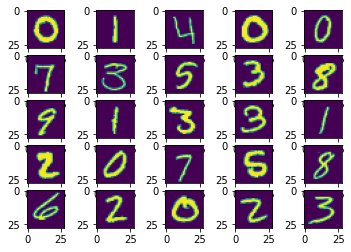

In [ ]:
plt.subplots(5,5)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train.iloc[i,::].to_numpy().reshape(28,28))

In [ ]:
x_train ,x_test , y_train ,  y_test = train_test_split(x_train,y_train,test_size=0.3,random_state = 33)

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
print("X train shape: ",x_train.shape)
print("Y train shape: ",y_train.shape)
print("X test shape: ",x_test.shape)
print("Y test shape: ",y_test.shape)

X train shape:  (29400, 784)
Y train shape:  (29400, 10)
X test shape:  (12600, 784)
Y test shape:  (12600, 10)


In [ ]:
print(np.unique(x_train)) # какие значения в массиве до нормализации
print(np.unique(x_test))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [ ]:
print(np.unique(x_train)) # какие значения в массиве после нормализации
print(np.unique(x_test))

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

###Создаём сеть, компилируем, обучаем

In [ ]:
model = Sequential() # Создаём полносвязную сеть
model.add(Dense(6000, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(4000, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
# print(model.summary()) #Вывод структуры модели
my_model = model.fit(x_train, y_train, batch_size=700, epochs=40, validation_data=(x_test, y_test), verbose=1)

Epoch 1/40
42/42 [==============================] - 4s 93ms/step - loss: 0.5678 - accuracy: 0.8338 - val_loss: 0.1352 - val_accuracy: 0.9583
Epoch 2/40
42/42 [==============================] - 4s 89ms/step - loss: 0.0999 - accuracy: 0.9682 - val_loss: 0.1000 - val_accuracy: 0.9710
Epoch 3/40
42/42 [==============================] - 3s 83ms/step - loss: 0.0530 - accuracy: 0.9819 - val_loss: 0.0934 - val_accuracy: 0.9728
Epoch 4/40
42/42 [==============================] - 4s 84ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.1124 - val_accuracy: 0.9711
Epoch 5/40
42/42 [==============================] - 4s 89ms/step - loss: 0.0247 - accuracy: 0.9914 - val_loss: 0.1053 - val_accuracy: 0.9729
Epoch 6/40
42/42 [==============================] - 4s 89ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.1182 - val_accuracy: 0.9708
Epoch 7/40
42/42 [==============================] - 4s 89ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.1184 - val_accuracy: 0.9741
Epoch 8/40
42

**###Далее идет небольшой блок проверко для подбора параметров, которые мы в итоге подадим в "верхнюю" модель**

nodes=15: 95.65
nodes=20: 95.73
nodes=50: 96.52
nodes=800: 97.69
nodes=1200: 97.72
nodes=2500: 97.54
nodes=4000: 97.78
nodes=6000: 97.90


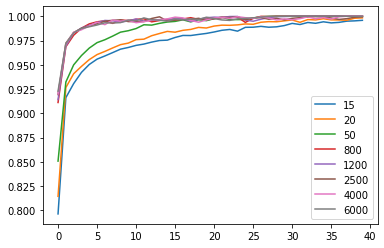

In [ ]:
num_nodes = [15, 20, 50, 800, 1200, 2500, 4000, 6000] # будем тестировать такие количества нейронов
learning_dict = {} # здесь сохраним результаты обучения
for n_nodes in num_nodes:
  model = Sequential() # Создаём полносвязную сеть
  model.add(Dense(n_nodes, input_dim=784, activation="relu")) # Добавляем полносвязный слой на n_nodes нейронов с relu-активацией
  model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
  model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
  history = model.fit(x_train, y_train, batch_size=128, epochs=40, verbose=0) # запускаем обучение без вывода прогресса (verbose=0)
  _, test_acc = model.evaluate(x_test, y_test, verbose=0) # оцениваем результатыобучения
  acc = round(test_acc * 100, 2) # переводим в проценты и округляем
  print('nodes=%d: %.2f' % (n_nodes, acc)) # выводим результаты
  learning_dict[n_nodes] = acc # сохраняем результаты в словарь
	
  plt.plot(history.history['accuracy'], label=str(n_nodes)) # строим кривые обучения
plt.legend()
plt.show() 

batch_size=700: 97.35
batch_size=300: 97.28
batch_size=100: 97.32
batch_size=50: 96.44
batch_size=10: 97.13


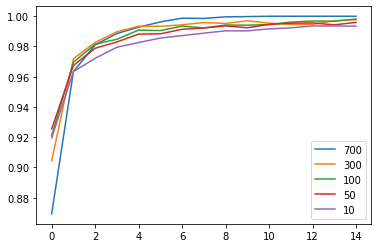

In [ ]:
batch_size = [700, 300, 100, 50, 10]
learning_dict2 = {} # здесь сохраним результаты обучения
for n in batch_size:
  model = Sequential() # Создаём полносвязную сеть
  model.add(Dense(6000, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 6000 нейронов с relu-активацией
  model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
  model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
  history = model.fit(x_train, y_train, batch_size=n, epochs=15, verbose=0)
  _, test_acc = model.evaluate(x_test, y_test, verbose=0)
  acc = round(test_acc * 100, 2) # переводим в проценты и округляем
  print('batch_size=%d: %.2f' % (n, acc))
	# plot learning curve
  plt.plot(history.history['accuracy'], label=str(n))
  learning_dict2[n] = acc # сохраняем результаты в словарь
plt.legend()
plt.show() 

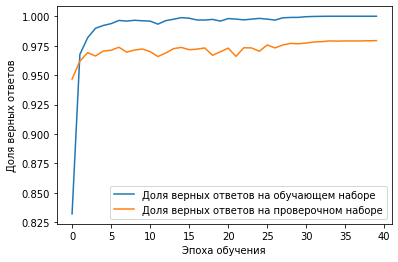

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(my_model.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(my_model.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

###Делаем предсказания моделью

In [ ]:
model.evaluate(x_test,y_test)

394/394 [==============================] - 3s 7ms/step - loss: 0.1173 - accuracy: 0.9821


[0.11732050031423569, 0.9820634722709656]

In [ ]:
y_pred = model.predict(test)
y = []
for i in range(0,len(y_pred)):
    prob = y.append(np.argmax(list(y_pred[i])))

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

###Переводим ответ в правильный формат, отсылаем для подсчёта рейтинга

In [ ]:
submission = pd.DataFrame({"ImageId":range(1,len(y_pred)+1),"Label":y})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
submission = submission.to_csv('/content/drive/MyDrive/datasets/kaggle/submission.csv',index=False,header=True)#,encoding='utf-8'

In [ ]:
!ls

digit-recognizer.zip  kaggle.json  sample_submission.csv  test.csv  train.csv


In [ ]:
#!kaggle competitions submit -c digit-recognizer -f submission.csv -m "Message" # для участия в общем соревновании

In [ ]:
!kaggle competitions submit -c udt3 -f submission.csv -m "Message" # для участия в соревновании группы

100% 208k/208k [00:08<00:00, 24.7kB/s]
Successfully submitted to Классификация цифр

###Переходим по ссылке, чтобы увидеть таблицу лидеров.

https://www.kaggle.com/c/udt3/leaderboard